# 

In [141]:
import phyloshape
import toytree
import pandas as pd
import k3d
import math
import numpy as np
from IPython.display import Image

In [144]:
from phyloshape.simulate.landmarks import get_beak_landmarks
from phyloshape.simulate.draw import draw_beak

In [436]:
mod = phyloshape.io.load_model_from_obj("/home/deren/Documents/PhyloShapeTest/data/cranolopha_DE183.obj")

In [438]:
mod.draw()

TypeError: mesh() missing 1 required positional argument: 'indices'

In [304]:
points = get_beak_landmarks(length=3.5, rotation=0, curve_y=1, beak_radius_start=3.5, beak_radius_end=2)
draw_beak(points, height=500, grid_visible=False, grid_auto_fit=False, )

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [305]:
from pathlib import Path

In [310]:
parent = Path("/tmp")
outdir = parent / "TEST"
outdir.mkdir(exist_ok=True)


In [323]:
frame = pd.read_csv("/tmp/test.csv", index_col=0)
LABELS = ["length", "rotation", "curve_x", "curve_y", "beak_radius_start"]

In [338]:
frame

,A-length,A-rotation,A-curve_x,A-curve_y,A-beak_radius_start,B-length,B-rotation,B-curve_x,B-curve_y,B-beak_radius_start,...,Banc4-length,Banc4-rotation,Banc4-curve_x,Banc4-curve_y,Banc4-beak_radius_start,AB-length,AB-rotation,AB-curve_x,AB-curve_y,AB-beak_radius_start
0,0.5,-6.283185,-1.0,-1.0,0.5,0.5,-6.283185,-1.0,-1.0,1.5,...,0.5,-6.283185,-1.0,-1.0,1.1,0.5,-6.283185,-1.0,-1.0,1.0
1,0.5,-6.283185,-1.0,-1.0,0.5,0.5,-6.283185,-1.0,-1.0,2.5,...,0.5,-6.283185,-1.0,-1.0,1.7,0.5,-6.283185,-1.0,-1.0,1.5
2,0.5,-6.283185,-1.0,-1.0,0.5,0.5,-6.283185,-1.0,0.0,0.5,...,0.5,-6.283185,-1.0,-0.4,0.5,0.5,-6.283185,-1.0,-0.5,0.5
3,0.5,-6.283185,-1.0,-1.0,0.5,0.5,-6.283185,-1.0,0.0,1.5,...,0.5,-6.283185,-1.0,-0.4,1.1,0.5,-6.283185,-1.0,-0.5,1.0
4,0.5,-6.283185,-1.0,-1.0,0.5,0.5,-6.283185,-1.0,0.0,2.5,...,0.5,-6.283185,-1.0,-0.4,1.7,0.5,-6.283185,-1.0,-0.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81805,7.0,6.283185,1.0,0.0,2.5,7.0,6.283185,1.0,1.0,1.5,...,7.0,6.283185,1.0,0.6,1.9,7.0,6.283185,1.0,0.5,2.0
81806,7.0,6.283185,1.0,0.0,2.5,7.0,6.283185,1.0,1.0,2.5,...,7.0,6.283185,1.0,0.6,2.5,7.0,6.283185,1.0,0.5,2.5
81807,7.0,6.283185,1.0,1.0,0.5,7.0,6.283185,1.0,1.0,1.5,...,7.0,6.283185,1.0,1.0,1.1,7.0,6.283185,1.0,1.0,1.0
81808,7.0,6.283185,1.0,1.0,0.5,7.0,6.283185,1.0,1.0,2.5,...,7.0,6.283185,1.0,1.0,1.7,7.0,6.283185,1.0,1.0,1.5


In [419]:
g = frame.iloc[0].groupby(lambda x: x.split("-")[0])

In [434]:
for name, series in g:
    params = dict(zip(LABELS, series.values))
    # print(name, params)
    arr = get_beak_landmarks(num_intervals=40, num_disc_points=15, **params)
    landmarks = arr.reshape((-1, 3))
    print(landmarks)

[[ 0.          0.07866722 -0.4937727 ]
 [-0.2032154   0.07965279 -0.44984323]
 [-0.37129304  0.06686567 -0.3281318 ]
 ...
 [ 2.0919514   0.08696247  0.5174367 ]
 [ 2.071176    0.09183223  0.55312634]
 [ 2.0375605   0.09438965  0.57746863]]
[[ 0.          0.4323162  -0.9017221 ]
 [-0.40571627  0.42090333 -0.81131667]
 [-0.7412805   0.33671245 -0.5806272 ]
 ...
 [ 0.10717872 -0.13700438  2.9000459 ]
 [ 0.08643971 -0.12276322  2.8669374 ]
 [ 0.05288329 -0.11434413  2.8438683 ]]
[[ 0.          0.04779107 -0.5980936 ]
 [-0.24329443  0.06268552 -0.5448654 ]
 [-0.44452107  0.06674108 -0.39742503]
 ...
 [ 0.10712598 -0.14655839  0.45728895]
 [ 0.0863985  -0.14531095  0.4212625 ]
 [ 0.05286073 -0.14598688  0.3966891 ]]
[[ 0.          0.05575625 -0.6977759 ]
 [-0.28384352  0.07313311 -0.6356763 ]
 [-0.5186079   0.07786459 -0.46366253]
 ...
 [ 0.10712598 -0.14655839  0.45728895]
 [ 0.0863985  -0.14531095  0.4212625 ]
 [ 0.05286073 -0.14598688  0.3966891 ]]
[[ 0.          0.06372143 -0.7974582 ]
 

In [401]:
v = frame.iloc[0, :5].values
v[0] = 0.5
v[1] = np.pi * -1
params = dict(zip(LABELS, v))
params

{'length': 0.5,
 'rotation': -3.141592653589793,
 'curve_x': -1.0,
 'curve_y': -1.0,
 'beak_radius_start': 0.5}

In [402]:
points = get_beak_landmarks(num_intervals=40, num_disc_points=15, **params)
draw_beak(points)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

In [303]:
tree.draw('p')

(<toyplot.canvas.Canvas at 0x7fe33fb795d0>,
 <toytree.drawing.src.mark_toytree.ToyTreeMark at 0x7fe2eb1b1690>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2a9a943672614f498afb92811dfb3ed2"> 0 1 2 3 4 5 6 7 8 9 10 A B 0 0.5 1

In [301]:
np.linspace([1, 2, 3], [2, 3, 4], 4)[:, 1:-1]

array([[2.        ],
       [2.33333333],
       [2.66666667],
       [3.        ]])

In [278]:
tree = toytree.rtree.unittree(ntips=2, treeheight=1)
tree[0].name = "A"
tree[1].name = "B"
tree[-1].name = "AB"

tree = tree.mod.add_internal_node("A", name="A-anc-4", dist=0.8)
tree = tree.mod.add_internal_node("A", name="A-anc-3", dist=0.6)
tree = tree.mod.add_internal_node("A", name="A-anc-2", dist=0.4)
tree = tree.mod.add_internal_node("A", name="A-anc-1", dist=0.2)

tree = tree.mod.add_internal_node("B", name="B-anc-4", dist=0.8)
tree = tree.mod.add_internal_node("B", name="B-anc-3", dist=0.6)
tree = tree.mod.add_internal_node("B", name="B-anc-2", dist=0.4)
tree = tree.mod.add_internal_node("B", name="B-anc-1", dist=0.2)

In [279]:
tree.draw('r', width=500, node_markers="r3x1");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="275.0px" viewBox="0 0 500.0 275.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6efc38ff604749378be4a8b6c960d63e"> A-anc-1 A-anc-2 A-anc-3 A-anc-4 B-anc-1 B-anc-2 B-anc-3 B-anc-4 AB A B

In [120]:
tree.pcm.simulate_continuous_brownian(rates=[1, 1], root_states=[1, 1], )

,t0,t1
0,0.218476,4.197510
1,0.958097,0.163552
2,1.000000,1.000000


In [135]:
import itertools
list(itertools.combinations([[2,3,4], [2,3,5]], 2))

[([2, 3, 4], [2, 3, 5])]

In [231]:
# all parameters of interest
params = np.array(list(itertools.product(
    np.linspace(0.5, 7, 3),                 # length @ 3 points
    np.linspace(-2 * np.pi, 2 * np.pi, 5),  # rotation @ 5 points
    np.linspace(-1, 1, 3),                  # curve_x @ 3 points
    np.linspace(-1, 1, 3),                  # curve_y @ 3 points
    np.linspace(0.5, 2.5, 3),               # beak_radius_start @ 3 points
)))

In [292]:
params

array([[ 0.5       , -6.28318531, -1.        , -1.        ,  0.5       ],
       [ 0.5       , -6.28318531, -1.        , -1.        ,  1.5       ],
       [ 0.5       , -6.28318531, -1.        , -1.        ,  2.5       ],
       ...,
       [ 7.        ,  6.28318531,  1.        ,  1.        ,  0.5       ],
       [ 7.        ,  6.28318531,  1.        ,  1.        ,  1.5       ],
       [ 7.        ,  6.28318531,  1.        ,  1.        ,  2.5       ]])

In [20]:
points_number = 15
spread_range = 30
positions = spread_range * np.random.random_sample((points_number, 3)) - spread_range / 2
colors = np.random.randint(0, 0xFFFFFF, points_number)

plot = k3d.plot(height=500, grid_visible=False)
points = k3d.points(positions.astype(np.float32), colors.astype(np.uint32), point_size=3.0, shader='mesh')
plot += points

plot.display()

Output()

In [21]:
plot.fetch_screenshot()

In [23]:
with open('screenshot.png', 'wb') as f:
    try:
        out = plot.screenshot.decode('base64')
    except: # Python 3
        from base64 import b64decode
        out = b64decode(plot.screenshot)    
    f.write(out)
    
Image(url='screenshot.png')

In [24]:
import ipywidgets

plot.camera_auto_fit = False
plot.grid_auto_fit = False

speeds = -0.5 * np.sign(positions)
out = ipywidgets.Output()

@plot.yield_screenshots
def coroutine():
    global positions
    for i in range(12):
        positions += speeds
        points.positions = positions.astype(np.float32)
        plot.fetch_screenshot()
        screenshot = yield
        with open('screenshot_%03d.png'%i, 'wb') as f:
            f.write(screenshot)
        with out:
            print('screenshot_%03d.png saved.'%i)
    with out:
        print('done.')

coroutine()
print('loop is running in background...')
out


loop is running in background...


Output()

In [26]:
!convert screenshot_*.png screenshot.gif && rm screenshot_*.png

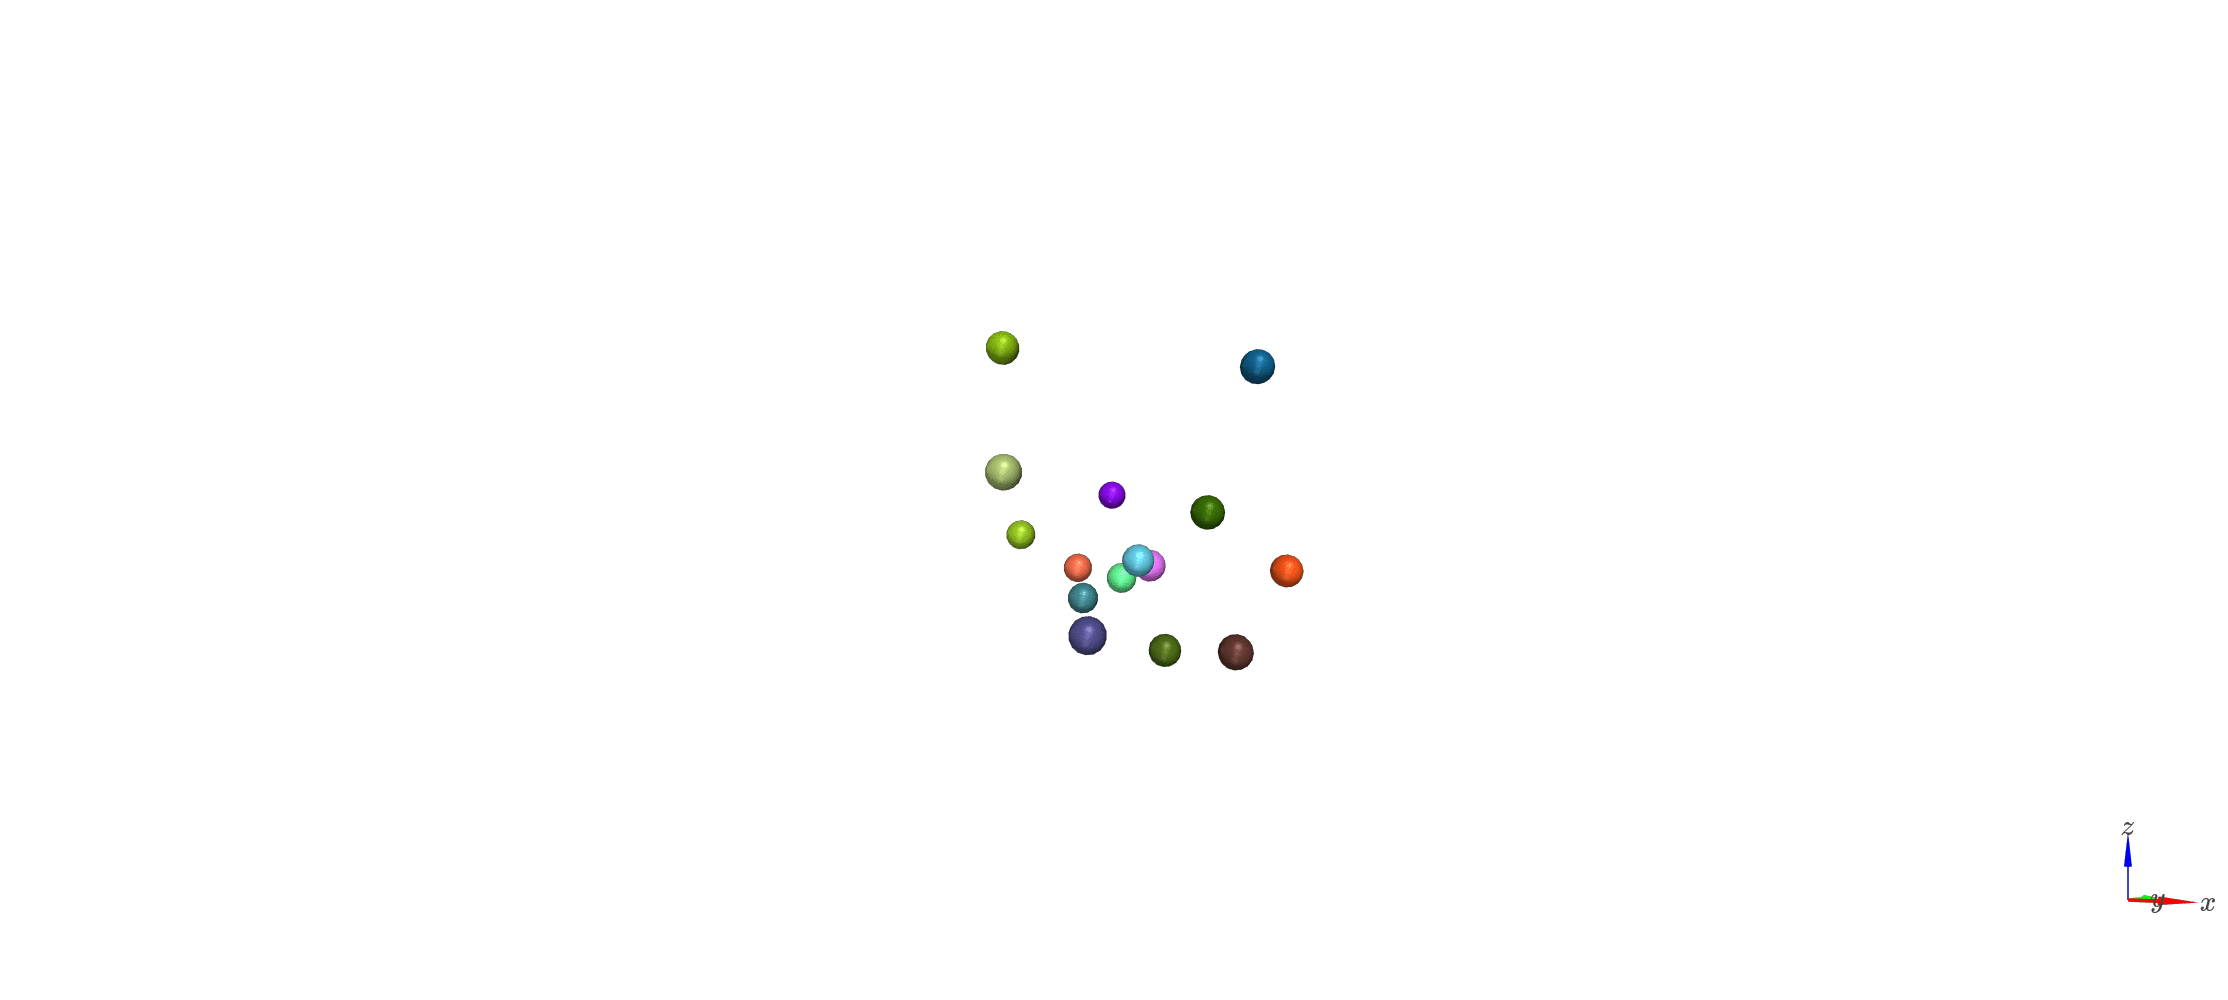

In [27]:
Image('screenshot.gif')